In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
def distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

In [88]:
# Задаване на координатната система
def create_field(figsize = (7,7), x_lim = (-20, 20), y_lim= (-20, 20)):
    plt.figure(figsize =figsize, )  

    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)   
    
    ax.spines['right'].set_visible(False)
    ax.set_aspect('equal')
    plt.axis('equal')
    
    plt.xlim(*x_lim)
    plt.ylim(*y_lim)
    
    plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
    
    plt.xlabel('X')
    plt.ylabel('Y')

In [89]:
def create_line(a,b, x_lim):
    x = np.linspace(*x_lim,500)
    y = a*x + b
    return x, y

In [123]:
def create_spiral(r_incr_velocity = 1, angle_velocity=1, init_angle=0, lin_space = (0, 100)):
    T = np.linspace(*lin_space, 2000)
    
    x = [r_incr_velocity * time * np.cos(init_angle + time * angle_velocity) for time in T]
    y = [r_incr_velocity * time * np.sin(init_angle + time * angle_velocity) for time in T]
    
    return x, y

In [135]:
def get_spiral_vec_coords(spiral_vec_magnitude,spiral_vec_velocity, angle_velocity, init_angle=0):
    # Т e времето за което спиралният вектор е достигнал съответната големина.
    # Чрез него ще намерим съответстващият ъгъл на завъртане на спиралата за тази големина на вектора
    T = spiral_vec_magnitude / spiral_vec_velocity
    spiral_angle = init_angle + T * angle_velocity
    
    x = spiral_vec_magnitude * np.cos(spiral_angle)
    y = spiral_vec_magnitude * np.sin(spiral_angle)
    
    # Връща началните координати на вектора - 0,0 - и крайните координати - x,y
    return 0, 0, x, y
    

In [146]:
def plot_objects():
    
    spiral_vec_magnitude = 15
    spiral_radius_velocity = 0.5 
    init_spiral_angle = - np.pi/2
    spiral_angle_velocity = 1
    create_field()
    
    x_line, y_line = create_line(-1.8, 10, (-20, 20))
    x_spiral, y_spiral = create_spiral(r_incr_velocity = spiral_radius_velocity, 
                                       init_angle = init_spiral_angle,
                                       angle_velocity = spiral_angle_velocity,
                                       lin_space= (0, 50))
 
    spiral_vec_coords = get_spiral_vec_coords(spiral_vec_magnitude, 
                                              spiral_radius_velocity,
                                              spiral_angle_velocity,
                                              init_spiral_angle)
    plt.quiver(*spiral_vec_coords, angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01, color = 'y')
    
    plt.plot(x_line, y_line, color='blue', linewidth=1, linestyle='-')
    
    plt.plot(x_spiral, y_spiral, color = 'red', linewidth = 1, linestyle = '-')
 

   
    plt.show()

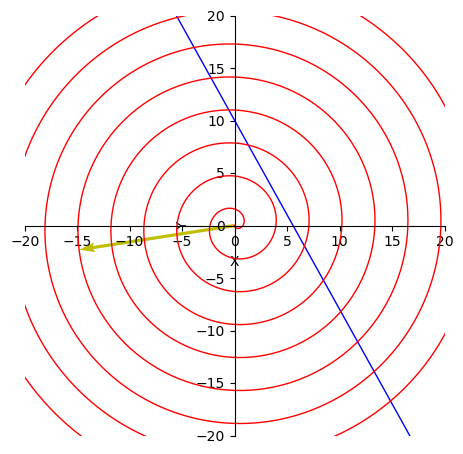

In [147]:
plot_objects()